## Imports: 

In [1]:
import tensorflow
from tensorflow  import keras
import matplotlib.pyplot as plt
import numpy as np

#### Loading DataSet:
##### Description: Loads the Fashion-MNIST dataset. 
##### This is a dataset of 60,000 28x28 grayscale 
##### images of 10 fashion categories, along with a test set of 10,000 images.

In [2]:
dataset = keras.datasets.fashion_mnist

In [3]:
((X_training, y_training), (X_test, y_test)) = dataset.load_data()

## Exploring the data


In [4]:
X_training.shape, X_test.shape, y_training.shape, y_test.shape

((60000, 28, 28), (10000, 28, 28), (60000,), (10000,))

##### checking the classifiers

In [5]:
y_training.min(), y_training.max()

(0, 9)

##### classifiers total = 10

## Viewing the data

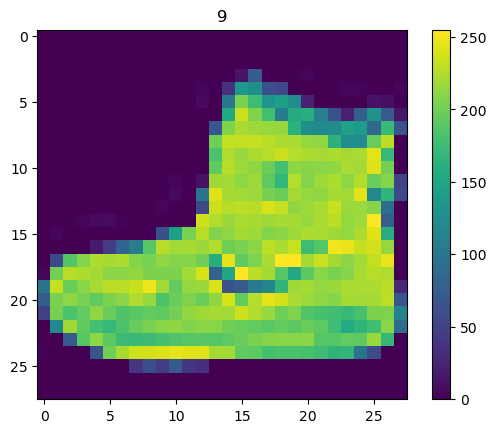

In [6]:
plt.imshow(X_training[0])
plt.title(y_training[0])
plt.colorbar()
plt.show()

##### colors = 250 

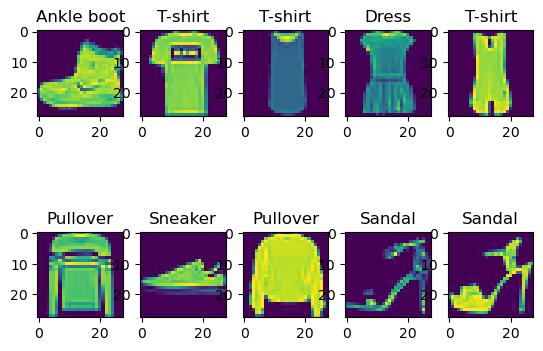

In [7]:
classifiers_name = ['T-shirt', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
for image in range(0, 10):
    plt.subplot(2, 5, image+1)
    plt.imshow(X_training[image])
    plt.title(classifiers_name[y_training[image]])

## Normalizing the data

In [8]:
X_training = X_training / float(255)
X_test = X_test / float(255)

## Training:
### Creating, compiling, training and normalizing the model with dropout.

In [9]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)), 
    keras.layers.Dense(256, activation=tensorflow.nn.relu),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(128, activation=tensorflow.nn.relu),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(10, activation=tensorflow.nn.softmax)
])

adam = keras.optimizers.Adam(learning_rate=0.001)

callbacks = [
    keras.callbacks.EarlyStopping(monitor='val_loss'),
    keras.callbacks.EarlyStopping(monitor='val_accuracy'),
    keras.callbacks.ModelCheckpoint(filepath='Model_best.Keras', 
                                   monitor='val_loss',
                                   save_best_only=True)
]


model.compile(optimizer=adam, 
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

history = model.fit(X_training, y_training, 
                   batch_size=480, 
                   epochs=30, 
                   validation_split=0.2, 
                   callbacks=callbacks)

Epoch 1/30
 97/100 [============================>.] - ETA: 0s - loss: 0.7616 - accuracy: 0.7372INFO:tensorflow:Assets written to: Model_best.Keras\assets


INFO:tensorflow:Assets written to: Model_best.Keras\assets


100/100 [==============================] - 3s 20ms/step - loss: 0.7536 - accuracy: 0.7400 - val_loss: 0.4822 - val_accuracy: 0.8271
Epoch 2/30
 99/100 [============================>.] - ETA: 0s - loss: 0.4681 - accuracy: 0.8340INFO:tensorflow:Assets written to: Model_best.Keras\assets


INFO:tensorflow:Assets written to: Model_best.Keras\assets


100/100 [==============================] - 2s 16ms/step - loss: 0.4678 - accuracy: 0.8340 - val_loss: 0.4022 - val_accuracy: 0.8542
Epoch 3/30
 98/100 [============================>.] - ETA: 0s - loss: 0.4134 - accuracy: 0.8518INFO:tensorflow:Assets written to: Model_best.Keras\assets


INFO:tensorflow:Assets written to: Model_best.Keras\assets


100/100 [==============================] - 2s 15ms/step - loss: 0.4141 - accuracy: 0.8516 - val_loss: 0.3813 - val_accuracy: 0.8637
Epoch 4/30
 98/100 [============================>.] - ETA: 0s - loss: 0.3849 - accuracy: 0.8629INFO:tensorflow:Assets written to: Model_best.Keras\assets


INFO:tensorflow:Assets written to: Model_best.Keras\assets


100/100 [==============================] - 2s 19ms/step - loss: 0.3851 - accuracy: 0.8628 - val_loss: 0.3596 - val_accuracy: 0.8702
Epoch 5/30
 96/100 [===========================>..] - ETA: 0s - loss: 0.3579 - accuracy: 0.8691INFO:tensorflow:Assets written to: Model_best.Keras\assets


INFO:tensorflow:Assets written to: Model_best.Keras\assets


100/100 [==============================] - 2s 18ms/step - loss: 0.3574 - accuracy: 0.8693 - val_loss: 0.3383 - val_accuracy: 0.8777
Epoch 6/30
100/100 [==============================] - 1s 9ms/step - loss: 0.3413 - accuracy: 0.8769 - val_loss: 0.3388 - val_accuracy: 0.8763


## Visualizing training and validation:

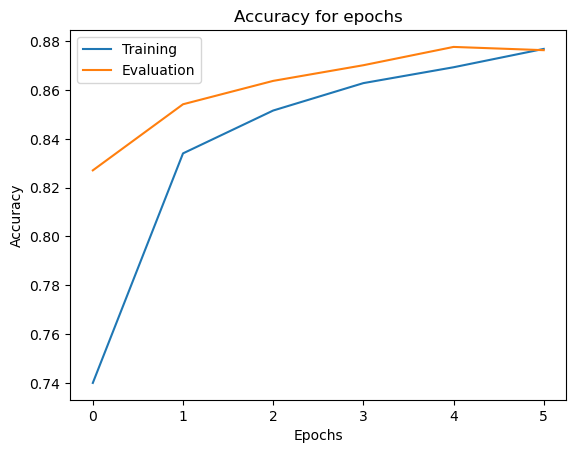

In [10]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Accuracy for epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Training', 'Evaluation'])
plt.show()

## Visualizing losses and validation:

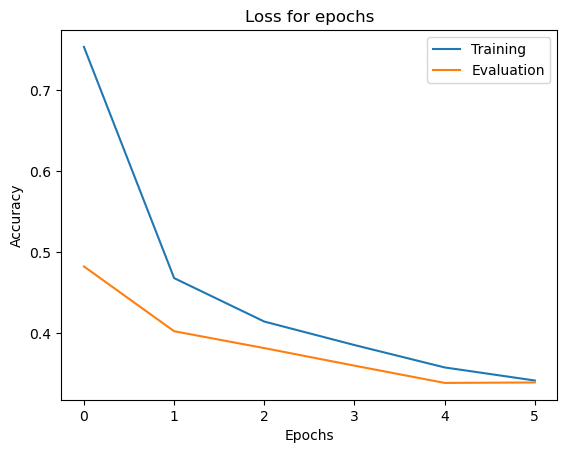

In [11]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss for epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Training', 'Evaluation'])
plt.show()

### Test with dataset training

In [12]:
test_X = model.predict(X_test)
prediction = np.argmax(test_X[0])

313/313 [==============================] - 1s 1ms/step


In [13]:
y_test[0]

9

In [14]:
print('\n')
print(f'>>>>>Prediction test: {prediction}')
print('\n')
print(f'>>>>>Real answer: {y_test[0]}')



>>>>>Prediction test: 9


>>>>>Real answer: 9


## Evaluating the model with the  test base:
#### Accuracy and Loss

In [15]:
loss_test, accuracy_test = model.evaluate(X_test, y_test)
print(f'\nLOSS: >>>>> {loss_test}')
print(f'\nACCURACY: >>>>> {accuracy_test}')

313/313 [==============================] - 1s 1ms/step - loss: 0.3637 - accuracy: 0.8705

LOSS: >>>>> 0.3636626601219177

ACCURACY: >>>>> 0.8705000281333923


## Saving model:

In [16]:
model.save('model_test.keras')